<a href="https://colab.research.google.com/github/varunraj42/First_Repo/blob/fresh_branch/Copy_of_Feature_Engineering_MeanMedianDay_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Missing Values- Feature Engineering- Day 1

Lifecycle of a Data Science Projects
1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey
1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

#### What are the different types of Missing Data?

1. ##### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


In [790]:
import pandas as pd
import seaborn as sns

In [791]:
pd.set_option('display.max_rows', 500)
titanic=pd.read_csv('train.csv')  
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [792]:
titanic.head()
display.maxrows=200
# titanic.head(200)

Check the dataset, and firstly look for Categorical Variables(either in num or string type) & Continuous Variables(obviously in num).
If you've got Continuous or Linear Variables, then we can consider using seaborn to analyze the relationship between dependent Vs each independent feature using sns.pairplots. But, if you see the above data (Pclass,Sex,SibSp,Parch,Embarked and even Age are all of Categorical Varibale type) So, let's take peace with pairplots for now ;)

But, see here dataset has null values.

In [793]:
import numpy as np
# titanic.isnull().sum()
# sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
titanic['age_null'] = np.where(titanic['Age'].isnull(),1,0)
titanic['cabin_null'] = np.where(titanic['Cabin'].isnull(),1,0)
titanic['age_null'].mean()
titanic['cabin_null'].mean()

0.7710437710437711

In [794]:
# titanic=titanic.drop(['Cabin','cabin_null'], axis=1)
# print(titanic.columns)
# titanic['Fare'].std()

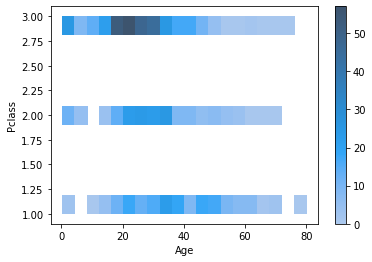

In [694]:
# sns.histplot(x=titanic['Age'], y=titanic['Pclass'], cbar=True, palette='rainbow')

So, Before starting to anaylze data, make sure you fill up those null values. And then, we can look into finding relationships as well as outliers in the data.

In [620]:
# titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Now, we need to understand how missing values occur. They are of three types:
1) MCAR (Missing completely at Random) --> Meaning, there is no any back reason or motive behind the missing data. 
Eg: Surveyer while collecting information, could've forgotten to take or note down the missing data
2) MAR (Missing At Random) --> there is definitely some logic or motive, behind the missing data.
Eg: Usually, people don't like to disclose about their mental health unlike their physical health. So, inaccurate or missing data will be collected.
3) MNAR (Missing Not at Random) --> To be Updated Soon :)

In [668]:
titanic['sex_male'] = np.where(titanic['Sex']=='male',1,0)
titanic['sex_female'] = np.where(titanic['Sex']=='female',1,0)
print(titanic.groupby(['Survived'])['sex_female'].sum())
print(titanic.groupby(['Survived'])['sex_male'].sum())

Survived
0     81
1    233
Name: sex_female, dtype: int64
Survived
0    468
1    109
Name: sex_male, dtype: int64


Coming back to Current Dataset, we have missing values on Age and Cabin Features.

In [622]:
import numpy as np
titanic['Age_null'] = np.where(titanic['Age'].isnull(),1,0)
titanic['Cabin_null'] = np.where(titanic['Cabin'].isnull(),1,0)
print("Null % in Age --> {}".format(titanic['Age_null'].mean()*100))
print("Null % in Cabin --> {}".format(titanic['Cabin_null'].mean()*100))

Null % in Age --> 19.865319865319865
Null % in Cabin --> 77.10437710437711


Now, "Cabin" has whopping 77% Null Values. This is serious and beyond my imagination, this cannot be considered for imputation. Hence, need to drop "Cabin" Feature and then, perform imputation for "Age".

But, before that remember we have to determine the reason behind the missing values right ;) Let's do that

In [623]:
titanic['Cabin_null'].value_counts()

1    687
0    204
Name: Cabin_null, dtype: int64

In [624]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_null',
       'Cabin_null'],
      dtype='object')

In [625]:
new_df = pd.DataFrame({'A':[1,0,1,0,1],'B':[1,0,1,0,1]})
new_df.groupby(['B'])['A'].sum()

B
0    0
1    3
Name: A, dtype: int64

The below output suggest that, the records of missing data are mostly of people who haven't survived (481) and little bit less for Survived(206)

In [626]:
titanic.groupby(['Survived'])['Cabin_null'].sum()

Survived
0    481
1    206
Name: Cabin_null, dtype: int64

This hints us to the fact, that this is MNAR and has a motive behind it. Now, just keep this in mind before doing any imputation.
Go ahead and drop the Cabin column now.

In [627]:
titanic = titanic.drop(['Cabin','Cabin_null'], axis=1)
titanic.groupby(['Survived'])['Age_null'].sum()

Survived
0    125
1     52
Name: Age_null, dtype: int64

#### Missing At Random(MAR)

#### Mean/ MEdian /Mode imputation
When should we apply?
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [809]:
pclass1_age = titanic.loc[~(titanic['Age'].isnull()) & (titanic['Pclass']==1), ['Age']]
pclass2_age = titanic.loc[~(titanic['Age'].isnull()) & (titanic['Pclass']==2), ['Age']]
pclass3_age = titanic.loc[~(titanic['Age'].isnull()) & (titanic['Pclass']==3), ['Age']]
print(pclass1_age['Age'].median())
print(pclass2_age['Age'].median())
print(pclass3_age['Age'].median())

37.0
29.0
24.0


In [810]:
import pandas as pd
import pdb
def impute_age_val(cols):
  age = cols[0]
  pclass = cols[1]
  if pd.isnull(age):    
    if pclass == 1:
      return 37.0
    elif pclass == 2:
      return 29.0
    elif pclass == 3:
      return 24.0
  else:
    return age

In [ ]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age_val, axis=1)
titanic = titanic.drop(['Cabin','Embarked','PassengerId','Name','Ticket','Fare','age_null','cabin_null'],axis=1)


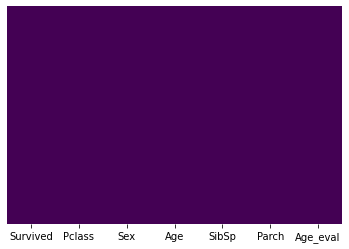

In [812]:
titanic['Age'] = titanic['Age'].astype('int')
titanic.dtypes
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
titanic['Surv_desc'] = np.where(titanic['Survived']==1, 'Alive','Dead')

In [841]:
def eval_feature_with_target(feature_col):
  cats = titanic[feature_col].value_counts().index.values    
  alive = list()
  dead = list()
  feature = list()
  age_sex_count = dict()  
  for cat in cats:
    titanic[feature_col+'_eval'] = np.where(titanic[feature_col]==cat,1,0)
    dump_df = pd.DataFrame()
    dump_df['Sex'] = titanic.loc[titanic['Age']==cat, 'Sex']
    # pdb.set_trace()
    male_count = dump_df['Sex'].value_counts().get('male')
    female_count = dump_df['Sex'].value_counts().get('female')
    age_sex_count[str(cat)] = (male_count, female_count)
    # print("Feature : {}  Value : {}\n Dead vs Survival Rate".format(feature_col,cat))
    # print(titanic.groupby(['Surv_desc'])[feature_col+'_eval'].sum())
    values = titanic.groupby(['Surv_desc'])[feature_col+'_eval'].sum().values
    dead.append(values[0])
    alive.append(values[1])
    feature.append(cat)    
  return alive,dead,feature,age_sex_count

In [846]:
alive, dead, age, age_sex_count = eval_feature_with_target('Age')
male = [age_sex_count[key][0] for key in age_sex_count.keys()]
female = [age_sex_count[key][1] for key in age_sex_count.keys()]

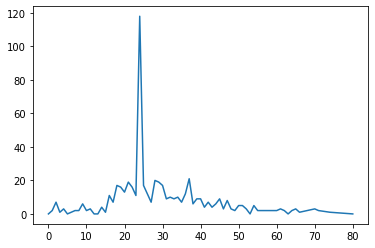

In [855]:
# alive, dead, age = eval_feature_with_target('Age')
sns.lineplot(x=age, y=alive)

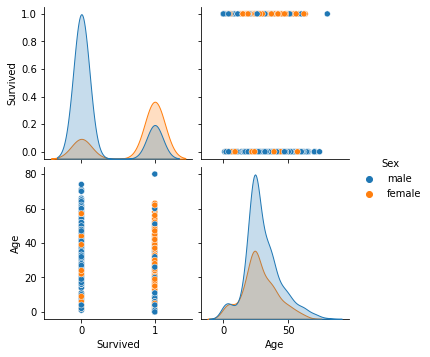

In [861]:
tit_fil = titanic[['Survived','Age','Sex']]
tit_fil.columns
sns.pairplot(tit_fil, hue='Sex')

In [643]:
alive,dead,age = eval_feature_with_target('Age_median')
age_eval_df = pd.DataFrame({'Age':age, 'Alive':alive, 'Dead':dead})
alive,dead,parch = eval_feature_with_target('Parch')
parch_eval_df = pd.DataFrame({'Parch':parch, 'Alive':alive, 'Dead':dead})
alive,dead,pclass = eval_feature_with_target('Pclass')
pclass_eval_df = pd.DataFrame({'Parch':pclass, 'Alive':alive, 'Dead':dead})

In [647]:
parch_eval_df.head()

,Parch,Alive,Dead
0,0,445,233
1,1,53,65
2,2,40,40
3,5,4,1
4,3,2,3


In [ ]:
sns.jointplot(x='Age', y='Alive', data=age_eval_df, kind='reg')
sns.jointplot(x='Age', y='Dead', data=age_eval_df, kind='reg')

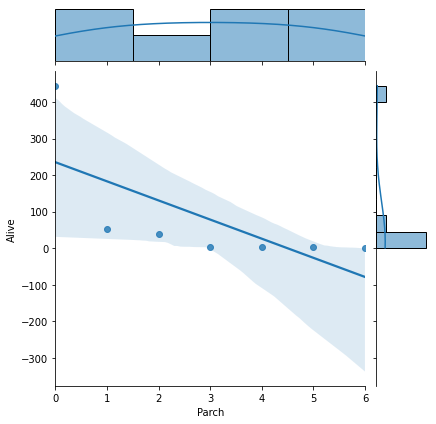

In [650]:
sns.jointplot(x='Parch', y='Alive', data=parch_eval_df, kind='reg')
sns.jointplot(x='Parch', y='Dead', data=parch_eval_df, kind='reg')

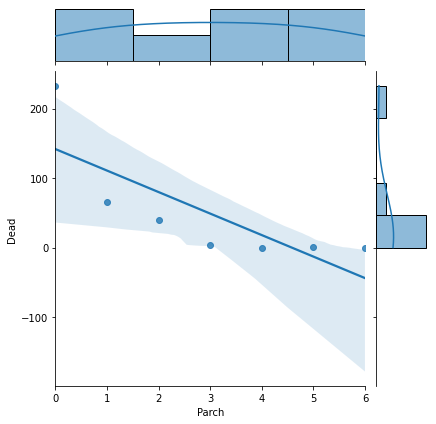

In [651]:
sns.jointplot(x='Pclass', y='Alive', data=parch_eval_df, kind='reg')
sns.jointplot(x='Pclass', y='Dead', data=parch_eval_df, kind='reg')

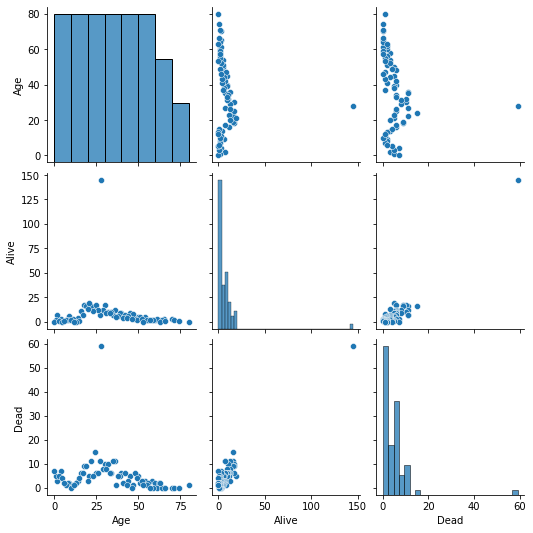

In [568]:
sns.pairplot(age_eval_df)

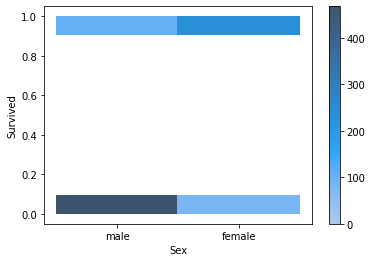

In [613]:
sns.histplot(x=titanic['Sex'], y=titanic['Survived'], cbar=True, kde=True)

In [351]:
print(titanic['Age'].std())
print(titanic['Age_median'].std())

14.526497332334044
13.019696550973194


In [352]:
titanic.shape

(891, 13)

In [353]:
import matplotlib.pyplot as plt
%matplotlib inline

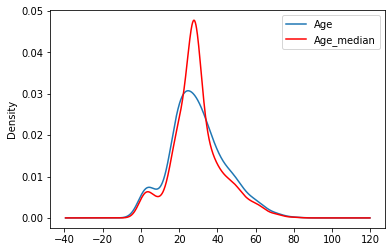

In [354]:
fig = plt.figure()
ax = fig.add_subplot(111)
titanic['Age'].plot(kind='kde', ax=ax)
titanic.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation


In [355]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [356]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Embarked','Age','Age_null','Age_median','Sex'],axis=1)
titanic.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [357]:
# titanic['Sex'] = np.where(titanic['Sex']=='male',1,0)

In [358]:
features = titanic.drop(['Survived'],axis=1)
target = titanic['Survived']

In [359]:
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.30, random_state=101)

In [360]:
model = LogisticRegression()

In [361]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [362]:
confusion_matrix(y_test, predictions)

array([[130,  24],
       [ 65,  49]])

In [363]:
accuracy_score(y_test, predictions)

0.667910447761194